In [1]:
#1 데이터 로드

import pandas as pd
import numpy as np

df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
#2
# datetime 컬럼을 datetime 형식으로 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 추가
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


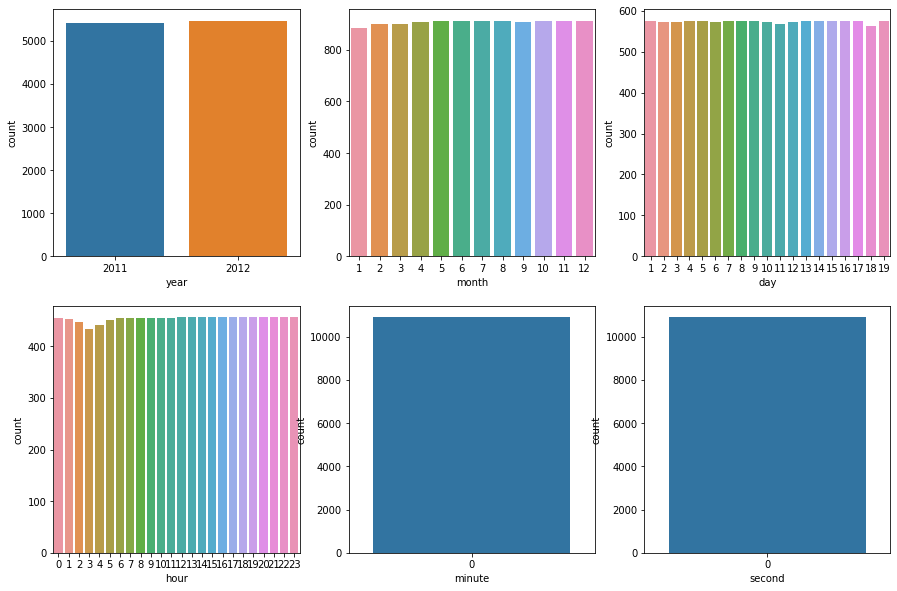

In [3]:
#3 시간 표현 데이터 개수 시각화하기

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))

plt.subplot(231)
sns.countplot(data=df, x='year')

plt.subplot(232)
sns.countplot(data=df, x='month')

plt.subplot(233)
sns.countplot(data=df, x='day')

plt.subplot(234)
sns.countplot(data=df, x='hour')

plt.subplot(235)
sns.countplot(data=df, x='minute')

plt.subplot(236)
sns.countplot(data=df, x='second')

plt.show()

In [4]:
#4 X,y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split


X = np.array(df[['temp','atemp','humidity','windspeed','month','hour']])
y = np.array(df[['count']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 6) (2178, 6) (8708, 1) (2178, 1)


In [5]:
#5 LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([[295.81515223],
       [ 14.8226504 ],
       [237.21776325],
       ...,
       [272.53351091],
       [ -5.93308219],
       [207.26013484]])

In [6]:
#6 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** (1/2)
print(mse, rmse)

21658.790824172364 147.16925910043975


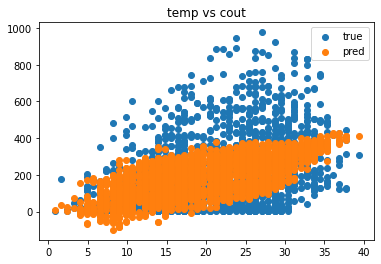

In [7]:
#7 예측결과 시각화 하기

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred, label="pred")
plt.title('temp vs cout')
plt.legend()
plt.show()

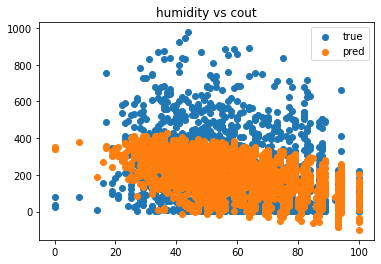

In [8]:
plt.scatter(X_test[:, 2], y_test, label="true")
plt.scatter(X_test[:, 2], y_pred, label="pred")
plt.title('humidity vs cout')
plt.legend()
plt.show()